<a href="https://www.kaggle.com/code/aryanprajapati33/exploratory-analysis-of-sih-2025-dataset?scriptVersionId=289982424" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/smart-india-hackathon-2025-team-outcomes/LICENSE
/kaggle/input/smart-india-hackathon-2025-team-outcomes/README.md
/kaggle/input/smart-india-hackathon-2025-team-outcomes/sih_2025_problem_statements_team_outcomes.csv


## Introduction

This notebook presents an exploratory data analysis (EDA) of the **Smart India Hackathon (SIH) 2025** dataset.

The objective is to:
- Validate data quality
- Understand distribution of problem statements and teams
- Analyze institutional and geographic participation
- Examine outcome and prize patterns

This analysis is intended to demonstrate dataset usability and provide baseline insights.


## 📂 Dataset Loading
We begin by loading the dataset and previewing its structure.


In [2]:
df = pd.read_csv("/kaggle/input/smart-india-hackathon-2025-team-outcomes/sih_2025_problem_statements_team_outcomes.csv")

df.head()


,edition_year,ps_id,problem_statement_title,category,theme,organization,department,total_submission,max_submission,serial_no,idea_id,team_id,team_name,team_leader_name,status,prize_money,aishe_code,institute_name,institute_city,institute_state
0,2025,SIH25001,Smart Community Health Monitoring and Early Wa...,Software,MedTech / BioTech / HealthTech,Ministry of Development of North Eastern Regio...,Ministry of Health Family Welfare/Ministry of ...,500,500,1,59902,52360,CORE_401,Shubh Sharma,Winner,150000.0,C-36237,"Acropolis Institute of Technology Research, Vi...",Indore,Madhya Pradesh
1,2025,SIH25001,Smart Community Health Monitoring and Early Wa...,Software,MedTech / BioTech / HealthTech,Ministry of Development of North Eastern Regio...,Ministry of Health Family Welfare/Ministry of ...,500,500,2,60472,50535,HackQuest,Shinie Dabre,Shortlisted,NaN,C-33882,St. Francis Institute of Technology Engineerin...,Mumbai Suburban,Maharashtra
2,2025,SIH25001,Smart Community Health Monitoring and Early Wa...,Software,MedTech / BioTech / HealthTech,Ministry of Development of North Eastern Regio...,Ministry of Health Family Welfare/Ministry of ...,500,500,3,75864,74525,bluds,Shresth Senwal,Shortlisted,NaN,U-0749,"MANIPAL UNIVERSITY, JAIPUR",Jaipur,Rajasthan
3,2025,SIH25001,Smart Community Health Monitoring and Early Wa...,Software,MedTech / BioTech / HealthTech,Ministry of Development of North Eastern Regio...,Ministry of Health Family Welfare/Ministry of ...,500,500,4,61828,53767,Flow,Rashmi Ranjan Behera,Shortlisted,NaN,C-30107,"Aryan Institute of Engineering and Technology,...",Khordha,Odisha
4,2025,SIH25001,Smart Community Health Monitoring and Early Wa...,Software,MedTech / BioTech / HealthTech,Ministry of Development of North Eastern Regio...,Ministry of Health Family Welfare/Ministry of ...,500,500,5,78281,61699,Curio,Sneha kumari,Shortlisted,NaN,U-0613,National Institute of Technology Manipur,Imphal West,Manipur


In [3]:
df.shape
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1870 entries, 0 to 1869
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   edition_year             1870 non-null   int64  
 1   ps_id                    1870 non-null   object 
 2   problem_statement_title  1870 non-null   object 
 3   category                 1870 non-null   object 
 4   theme                    1870 non-null   object 
 5   organization             1870 non-null   object 
 6   department               1870 non-null   object 
 7   total_submission         1870 non-null   int64  
 8   max_submission           1870 non-null   int64  
 9   serial_no                1870 non-null   int64  
 10  idea_id                  1870 non-null   int64  
 11  team_id                  1870 non-null   int64  
 12  team_name                1870 non-null   object 
 13  team_leader_name         1870 non-null   object 
 14  status                  

edition_year                  0
ps_id                         0
problem_statement_title       0
category                      0
theme                         0
organization                  0
department                    0
total_submission              0
max_submission                0
serial_no                     0
idea_id                       0
team_id                       0
team_name                     0
team_leader_name              0
status                        0
prize_money                1548
aishe_code                    0
institute_name                0
institute_city                0
institute_state               0
dtype: int64

### 🗺️ Top 10 States by Participation

This analysis shows which states contribute the highest number of submissions,
highlighting regional participation trends.

In [4]:
top_states = (
    df['institute_state']
    .value_counts()
    .head(10)
    .reset_index()
)

top_states.columns = ['State', 'Count']
top_states

,State,Count
0,Tamil Nadu,394
1,Maharashtra,374
2,Uttar Pradesh,142
3,Madhya Pradesh,129
4,Karnataka,109
5,West Bengal,95
6,Telangana,86
7,Andhra Pradesh,78
8,Delhi,75
9,Gujarat,58


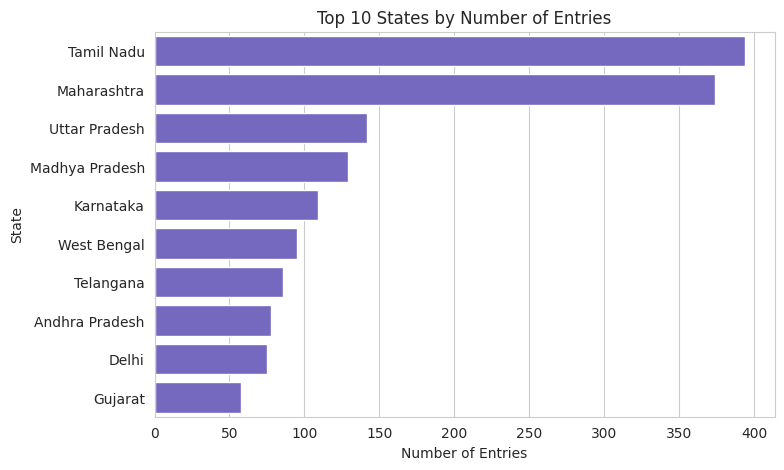

In [5]:
plt.figure(figsize=(8,5))
sns.barplot(
    data=top_states,
    y='State',
    x='Count',
    color='#6A5ACD'
)
plt.title("Top 10 States by Number of Entries")
plt.xlabel("Number of Entries")
plt.ylabel("State")
plt.show()

### 📌 Insight:
Participation is unevenly distributed across states,
with a few states dominating the overall dataset.

### 🏢 Top 10 Organizations by Number of Entries

This section highlights the Institutes with the highest participation in
SIH 2025, helping identify institutions that actively contribute the most projects.


In [6]:
top_institutes = (
    df['institute_name']
    .value_counts()
    .head(10)
    .reset_index()
)

top_institutes.columns = ['Institute', 'Count']
top_institutes


,Institute,Count
0,Delhi Technological University,17
1,Chennai Institute of Technology,16
2,Sri Sairam Engineering College,15
3,Sri Venkateswara College of Engineering,15
4,"RATHINAM TECHNICAL CAMPUS, COIMBATORE",13
5,BAJAJ INSTITUTE OF TECHNOLOGY,12
6,Rajalakshmi Engineering College,12
7,Sri Venkateswaraa College of Technology,12
8,Heritage Institute of Technology 126,12
9,NETAJI SUBHAS UNIVERSITY OF TECHNOLOGY,11


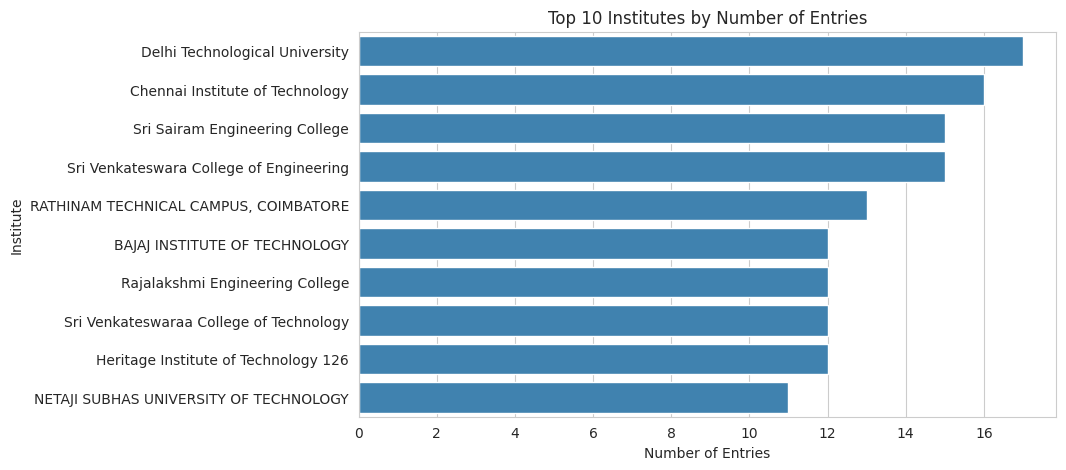

In [7]:
plt.figure(figsize=(9,5))
sns.barplot(
    data=top_institutes,
    y='Institute',
    x='Count',
    color='#2E86C1'
)
plt.title("Top 10 Institutes by Number of Entries")
plt.xlabel("Number of Entries")
plt.ylabel("Institute")
plt.show()


### 📌 Insight:
A small number of institutes contribute a disproportionately high number of entries,
indicating strong institutional engagement and awareness of the SIH program.


### 🏆 Winner-Only Analysis

This section focuses exclusively on projects that achieved **Winner** or
**Joint Winner** or **Other Awards**status , helping identify regions with strong performance
rather than just high participation.


In [8]:
winner_df = df[df['status'].isin(['Winner', 'Joint Winner', 'Consolation Prize', 'Future Innovators Award', 'Quantum Frontier Award', 'Girls Achiever Award', 'First Prize', 'Second Prize', 'Third Prize'])]
winner_df.head()


,edition_year,ps_id,problem_statement_title,category,theme,organization,department,total_submission,max_submission,serial_no,idea_id,team_id,team_name,team_leader_name,status,prize_money,aishe_code,institute_name,institute_city,institute_state
0,2025,SIH25001,Smart Community Health Monitoring and Early Wa...,Software,MedTech / BioTech / HealthTech,Ministry of Development of North Eastern Regio...,Ministry of Health Family Welfare/Ministry of ...,500,500,1,59902,52360,CORE_401,Shubh Sharma,Winner,150000.0,C-36237,"Acropolis Institute of Technology Research, Vi...",Indore,Madhya Pradesh
10,2025,SIH25002,Smart Tourist Safety Monitoring & Incident Res...,Software,Travel & Tourism,Ministry of Development of North Eastern Regio...,Ministry of Tourism/ Ministry of Home Affairs ...,500,500,4,62995,69738,ITerativebytes,Saniyaa B Shetty,Winner,150000.0,C-33777,Shri Vile Parle Kelavani Mandals Dwarkadas J....,Mumbai Suburban,Maharashtra
17,2025,SIH25003,Low-Cost smart transportation solution for Agr...,Hardware,Transportation & Logistics,Ministry of Development of North Eastern Regio...,Ministry of Rural Development/ Ministry of Env...,223,500,4,89004,90940,TheSixthSense,Shaik Hayath Ahmed,Winner,150000.0,U-0025,"National Institute of Technology, Warangal",Warangal Rural,Telangana
23,2025,SIH25004,lmage based breed recognition for cattle and b...,Software,"Agriculture, FoodTech & Rural Development","Ministry of Fisheries, Animal Husbandry Dairying",Department of Animal Husbandry Dairying (DoAH&D),500,500,3,95429,99556,A-6,Bhagirath Auti,Winner,150000.0,U-0891,"MIT Art, Design and Technology University, Pune",Pune,Maharashtra
31,2025,SIH25005,lmage based Animal Type Classification for cat...,Software,"Agriculture, FoodTech & Rural Development","Ministry of Fisheries, Animal Husbandry Dairying",Department of Animal Husbandry Dairying (DoAH&D),500,500,4,95480,99919,SkyNRG,Nancy Srivastava,Winner,150000.0,U-0205,Indian Institute of Technology,Dhanbad,Jharkhand


In [9]:
top_winner_states = (
    winner_df['institute_state']
    .value_counts()
    .head(10)
    .reset_index()
)

top_winner_states.columns = ['State', 'Winner Count']
top_winner_states


,State,Winner Count
0,Maharashtra,82
1,Tamil Nadu,77
2,Karnataka,24
3,Uttar Pradesh,24
4,Delhi,16
5,Madhya Pradesh,15
6,Telangana,13
7,Andhra Pradesh,11
8,Rajasthan,8
9,Chhattisgarh,8


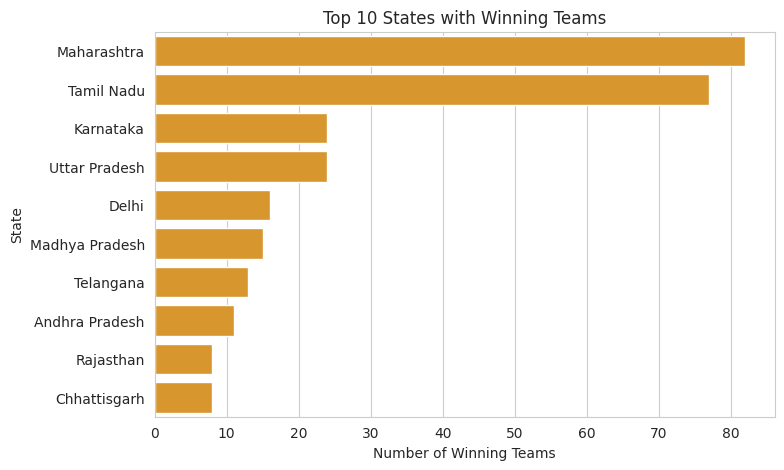

In [10]:
plt.figure(figsize=(8,5))
sns.barplot(
    data=top_winner_states,
    y='State',
    x='Winner Count',
    color='#F39C12'
)
plt.title("Top 10 States with Winning Teams")
plt.xlabel("Number of Winning Teams")
plt.ylabel("State")
plt.show()


### 📌 Insight:
Winning teams are concentrated in a limited number of states,
indicating that sometimes higher participation does not always translate
into higher success rates.


### 💰 Prize Money Distribution

This section analyzes how prize money is distributed among projects.
It helps understand whether rewards are evenly spread or concentrated
among a small number of teams.


In [11]:
# Convert prize_money to numeric (safe conversion)
df['prize_money'] = pd.to_numeric(df['prize_money'], errors='coerce')

# Consider only rows where prize money exists
prize_df = df[df['prize_money'].notna()]

prize_df[['prize_money']].head()


,prize_money
0,150000.0
10,150000.0
17,150000.0
23,150000.0
31,150000.0


In [12]:
prize_counts = (
    prize_df['prize_money']
    .astype(int)
    .value_counts()
    .sort_index()
    .reset_index()
)

prize_counts.columns = ['Prize Money', 'Number of Teams']
prize_counts


,Prize Money,Number of Teams
0,10000,3
1,15000,3
2,20000,2
3,25000,1
4,50000,1
5,75000,107
6,100000,1
7,150000,204


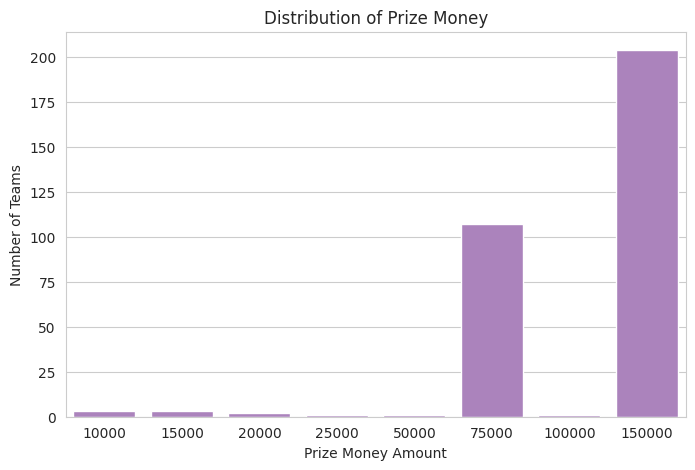

In [13]:
plt.figure(figsize=(8,5))
sns.barplot(
    data=prize_counts,
    x='Prize Money',
    y='Number of Teams',
    color='#AF7AC5'
)
plt.title("Distribution of Prize Money")
plt.xlabel("Prize Money Amount")
plt.ylabel("Number of Teams")
plt.show()


### 📌 Insight:
Prize money distribution is highly skewed,
with a small number of teams receiving higher rewards,
indicating a strong emphasis on top-performing projects.


## 🔑 Key Insights Summary

- Participation is highly concentrated among a small number of states and organizations,
  indicating uneven regional and institutional engagement.

- While some states and organizations submit a large number of projects,
  winning outcomes are more concentrated, showing that high participation
  does not always translate into higher success rates.

- The majority of projects fall under the **Shortlisted** category,
  highlighting the competitive nature of the evaluation process.

- Winner-only analysis reveals regional centers of excellence,
  where fewer entries result in a higher proportion of winning teams.

- Overall, the dataset reflects strong competition with limited winning slots,
  emphasizing quality and innovation over quantity.
